# Import

In [ ]:
from google.colab import drive
import os
import re
import pickle
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from keras.preprocessing import text, sequence
from keras.layers import Input, Dense, Embedding, Flatten, Conv2D, MaxPool2D, Bidirectional, LSTM, GRU, concatenate, GlobalMaxPooling1D, GlobalAveragePooling1D, SpatialDropout1D
from keras.layers import Reshape, Flatten, Dropout, Concatenate
from keras.callbacks import ModelCheckpoint
from keras.models import Model, Sequential
from keras import backend as K
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Data is unbalanced
import nltk
import string

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB , BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# PATH

In [ ]:
drive.mount('/content/drive/')
DIR_ROOT = '/content/drive/MyDrive/Colab Notebooks/'
DIR_DATASET = os.path.join(DIR_ROOT, 'data/')

PATH_CLEAN_TRAIN = os.path.join(DIR_DATASET, 'data_train.xlsx')
PATH_CLEAN_DEV = os.path.join(DIR_DATASET, 'data_dev.xlsx')
PATH_CLEAN_TEST = os.path.join(DIR_DATASET, 'data_test.xlsx')

MODEL_DIR = os.path.join(DIR_ROOT, 'model')
if not os.path.exists(MODEL_DIR):
    os.makedirs(MODEL_DIR)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Load data

In [ ]:
data_train = pd.read_excel(PATH_CLEAN_TRAIN)
data_dev = pd.read_excel(PATH_CLEAN_DEV)
data_test = pd.read_excel(PATH_CLEAN_TEST)

# Model Building

## Machine Learning Models



### **CountVectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=100)

In [ ]:
x_train_count=cv.fit_transform(data_train['transformed_text']).toarray()
x_dev_count=cv.transform(data_dev['transformed_text']).toarray()
x_test_count=cv.transform(data_test['transformed_text']).toarray()
x_train_count.shape


(14158, 100)

In [ ]:
x_train_count.shape

(14158, 100)

In [ ]:
x_dev_count.shape

(1580, 100)

In [ ]:
y_train=data_train['Label']

y_dev=data_dev['Label']

y_test=data_test['Label']

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score, average_precision_score, ConfusionMatrixDisplay

In [ ]:
from wordcloud.wordcloud import Random
svc= SVC (kernel='sigmoid', gamma=1.0)
knc= KNeighborsClassifier()
mnb= MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()
dtc= DecisionTreeClassifier(max_depth=5)
lrc= LogisticRegression(solver='liblinear', penalty='l1')
rfc= RandomForestClassifier(n_estimators=50, random_state=2)
abc= AdaBoostClassifier(n_estimators=50, random_state=2)
bc= BaggingClassifier(n_estimators=50, random_state=2)
etc= ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt= GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb= XGBClassifier(n_estimators=50, random_state=2)

In [ ]:
clfs= {
    'SVC': svc,
    'kn':knc,
 'mnb':mnb,
  'gnb': gnb,
  'bnb':bnb,
 'DT':dtc,
 'LR':lrc,
 'RF': rfc,
 'AdaBoost':abc,
 'BgC':bc,
 'ETC':etc,
 'GradientBt':gbdt,
 'XGB':xgb
}

In [ ]:
def train_countVectorizer(clf, x_train_count, y_train, x_test_count, y_test):
  clf.fit(x_train_count, y_train)
  y_pred=clf.predict(x_test_count)
  accuracy=accuracy_score(y_test, y_pred)
  precision=precision_score(y_test, y_pred)
  f1_macro = f1_score(y_test, y_pred, average='macro')

  confusion_matrix (y_test, y_pred)
  # precision=precision_score(x_dev_count, y_pred)

  return accuracy, precision, f1_macro

In [ ]:
accuracy_scores=[]
precision_scores=[]
f1_macro=[]
for name, clf in clfs.items():
  current_accuracy, current_precision, current_f1=train_countVectorizer(clf, x_train_count, y_train, x_test_count, y_test)
  print ('For ', name)
  print ('Accuracy - ',current_accuracy)
  print ('Precision - ',current_precision)
  print ('f1_macro - ',current_f1)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)
  f1_macro.append(current_f1)


For  SVC
Accuracy -  0.6732572877059569
Precision -  0.4011352885525071
f1_macro -  0.5863804776918083
For  kn
Accuracy -  0.7335868187579214
Precision -  0.5133887349953832
f1_macro -  0.6652920552741026
For  mnb
Accuracy -  0.700126742712294
Precision -  0.40264650283553877
f1_macro -  0.5382074580682672
For  gnb
Accuracy -  0.5967046894803549
Precision -  0.38847664775207336
f1_macro -  0.5879820913695161
For  bnb
Accuracy -  0.7505703422053231
Precision -  0.543557168784029
f1_macro -  0.6883239758050996
For  DT
Accuracy -  0.7300380228136882
Precision -  0.7027027027027027
f1_macro -  0.4446556387129316
For  LR
Accuracy -  0.7908745247148289
Precision -  0.7419354838709677
f1_macro -  0.6776571661799934
For  RF
Accuracy -  0.7979721166032953
Precision -  0.6874172185430464
f1_macro -  0.717020410091869
For  AdaBoost
Accuracy -  0.7916349809885932
Precision -  0.7216494845360825
f1_macro -  0.6867152883565312
For  BgC
Accuracy -  0.7789607097591889
Precision -  0.6195402298850575
f

In [ ]:
performance_df=pd.DataFrame ({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'f1_macro':f1_macro, 'Precision':precision_scores}).sort_values('Accuracy', ascending=False)

In [ ]:
performance_df1=pd.melt(performance_df, id_vars='Algorithm')

In [ ]:
performance_df

,Algorithm,Accuracy,f1_macro,Precision
12,XGB,0.804309,0.711075,0.746795
10,ETC,0.802788,0.719133,0.712079
7,RF,0.797972,0.717020,0.687417
8,AdaBoost,0.791635,0.686715,0.721649
6,LR,0.790875,0.677657,0.741935
9,BgC,0.778961,0.703010,0.619540
4,bnb,0.750570,0.688324,0.543557
1,kn,0.733587,0.665292,0.513389
5,DT,0.730038,0.444656,0.702703
11,GradientBt,0.729531,0.433403,1.000000


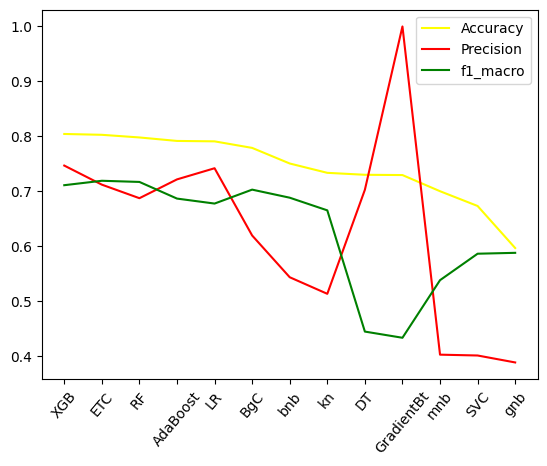

In [ ]:
# plt.set_facecolor()
plt.plot(performance_df["Algorithm"], performance_df["Accuracy"], label="Accuracy", color='yellow')
plt.plot(performance_df["Algorithm"], performance_df["Precision"], label="Precision", color='red')
plt.plot(performance_df["Algorithm"], performance_df["f1_macro"], label="f1_macro", color='green')

plt.xticks(rotation=50, fontsize=10, color='black' )
plt.legend()
plt.show()

### Model Testing

In [ ]:
dics = {1: "Spam" , 0:"No-Spam" }
#user input
# text = "Shopee giao hàng nhanh lắm, chỉ vai ngay là minh nhận được hàng rồi"
# text = 'Hình ảnh chỉ mang tính chất nhận xu'
text = 'addddđ đẹppppppppppppppp lắmmmmmmmmmmm'
# text = "quần hơi rộng so với mình, nó quá dài nên không vừa với người mình cho lắm, hơi thất vọng"
# text = 'Nước tẩy trang rất ok, giá rẻ, chất lượng tốt, dùng tẩy trang hằng ngày thì 2 bông là oklah🌟🌟🌟'
# first we create a vector of this review
vector1 = cv.transform([text]).A

# getting prediction
prediction = etc.predict(vector1)

# printing the results
print("The email is:: ",dics[prediction[0]])

The email is::  Spam


### **TfidfVectorizer**


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(lowercase=True, max_features=100, max_df=0.8, min_df=5, ngram_range=(1,3))

In [ ]:
x_train_tfidf=tfidf.fit_transform(data_train['transformed_text']).toarray()
x_dev_tfidf=tfidf.fit_transform(data_dev['transformed_text']).toarray()
x_test_tfidf=tfidf.fit_transform(data_test['transformed_text']).toarray()
x_train_tfidf

array([[0.        , 0.        , 0.27226678, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.26398244, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.15900419, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
def train_tfidf(clf, x_train_tfidf, y_train, x_dev_tfidf, y_dev):
  clf.fit(x_train_tfidf, y_train)
  y_pred=clf.predict(x_dev_tfidf)
  accuracy=accuracy_score(y_dev, y_pred)
  precision=precision_score(y_dev, y_pred)
  f1=f1_score(y_dev, y_pred)
  confusion_matrix (y_dev, y_pred)
  # precision=precision_score(x_dev_count, y_pred)

  return accuracy, precision, f1

In [ ]:
accuracy_scores=[]
precision_scores=[]
f1_macro=[]
for name, clf in clfs.items():
  current_accuracy, current_precision, current_f1=train_tfidf(clf, x_train_tfidf, y_train, x_dev_tfidf, y_dev)
  print ('For ', name)
  print ('Accuracy - ',current_accuracy)
  print ('Precision - ',current_precision)
  print ('f1_macro - ',current_f1)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)
  f1_macro.append(current_f1)


For  SVC
Accuracy -  0.6529709228824273
Precision -  0.3907637655417407
f1_macro -  0.4448938321536906
For  kn
Accuracy -  0.6997471554993678
Precision -  0.44842105263157894
f1_macro -  0.4728079911209767
For  mnb
Accuracy -  0.7307206068268015
Precision -  0.5
f1_macro -  0.004672897196261682
For  gnb
Accuracy -  0.5948166877370418
Precision -  0.362002567394095
f1_macro -  0.4680497925311203
For  bnb
Accuracy -  0.7130214917825537
Precision -  0.4739776951672863
f1_macro -  0.5290456431535269
For  DT
Accuracy -  0.7307206068268015
Precision -  0.5
f1_macro -  0.01388888888888889
For  LR
Accuracy -  0.7572692793931732
Precision -  0.5621301775147929
f1_macro -  0.49738219895287955
For  RF
Accuracy -  0.7648546144121365
Precision -  0.5950704225352113
f1_macro -  0.476056338028169
For  AdaBoost
Accuracy -  0.7364096080910241
Precision -  0.5132743362831859
f1_macro -  0.4549019607843138
For  BgC
Accuracy -  0.7616940581542352
Precision -  0.5813953488372093
f1_macro -  0.4814305364511

In [ ]:
performance_df_tfidf=pd.DataFrame ({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'f1_macro':f1_macro, 'Precision':precision_scores}).sort_values('Accuracy', ascending=False)

In [ ]:
performance_df_tfidf_1=pd.melt(performance_df, id_vars='Algorithm')

In [ ]:
performance_df_tfidf

,Algorithm,Accuracy,f1_macro,Precision
7,RF,0.764855,0.476056,0.595070
10,ETC,0.762958,0.434389,0.607595
9,BgC,0.761694,0.481431,0.581395
6,LR,0.757269,0.497382,0.562130
12,XGB,0.754741,0.506361,0.552778
8,AdaBoost,0.736410,0.454902,0.513274
11,GradientBt,0.732617,0.013986,1.000000
2,mnb,0.730721,0.004673,0.500000
5,DT,0.730721,0.013889,0.500000
4,bnb,0.713021,0.529046,0.473978


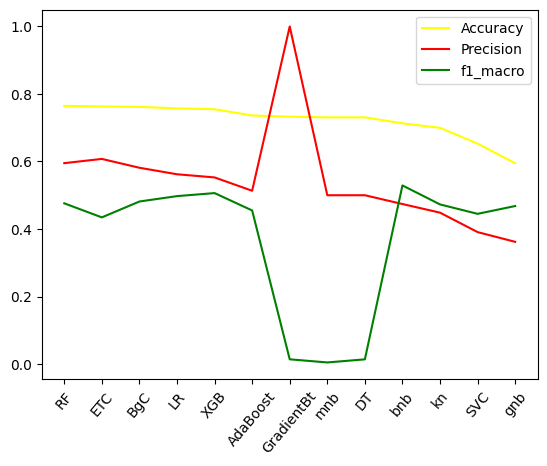

In [ ]:
# plt.set_facecolor()
plt.plot(performance_df_tfidf["Algorithm"], performance_df_tfidf["Accuracy"], label="Accuracy", color='yellow')
plt.plot(performance_df_tfidf["Algorithm"], performance_df_tfidf["Precision"], label="Precision", color='red')
plt.plot(performance_df_tfidf["Algorithm"], performance_df_tfidf["f1_macro"], label="f1_macro", color='green')

plt.xticks(rotation=50, fontsize=10, color='black' )
plt.legend()
plt.show()

## Deep Learning Models

### ANN CountVectorizer

In [ ]:
from tensorflow.keras.layers import Dense, Input, Flatten, SimpleRNN, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
# import tensorflow_addons as tfa


In [ ]:
early_stop=EarlyStopping(monitor='loss', patience=10, verbose=1)

In [ ]:
model_ANN = tf.keras.Sequential()
model_ANN.add(Input(shape=(x_train_count.shape[1])))
model_ANN.add(Dense(128, activation='relu'))
model_ANN.add(Dense(64, activation='relu'))
model_ANN.add(Dense(32, activation='relu'))
model_ANN.add(Dense(1, activation='sigmoid') )

model_ANN.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=1e-4),
    metrics=['accuracy']
)
model_ANN. summary()
# model_ANN.fit(x_train_count, y_train, batch_size=3, epochs=40, verbose=1, callbacks=early_stop)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 23,297
Trainable params: 23,297
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_ANN.fit(x_train_count, y_train, batch_size=3, epochs=40, verbose=1, callbacks=early_stop)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


4720/4720 [==============================] - 10s 2ms/step - loss: 0.5163 - accuracy: 0.7457
Epoch 2/40
4720/4720 [==============================] - 10s 2ms/step - loss: 0.4711 - accuracy: 0.7906
Epoch 3/40
4720/4720 [==============================] - 10s 2ms/step - loss: 0.4530 - accuracy: 0.8076
Epoch 4/40
4720/4720 [==============================] - 9s 2ms/step - loss: 0.4392 - accuracy: 0.8125
Epoch 5/40
4720/4720 [==============================] - 22s 5ms/step - loss: 0.4261 - accuracy: 0.8167
Epoch 6/40
4720/4720 [==============================] - 24s 5ms/step - loss: 0.4131 - accuracy: 0.8195
Epoch 7/40
4720/4720 [==============================] - 25s 5ms/step - loss: 0.4008 - accuracy: 0.8239
Epoch 8/40
4720/4720 [==============================] - 23s 5ms/step - loss: 0.3913 - accuracy: 0.8262
Epoch 9/40
4720/4720 [==============================] - 20s 4ms/step - loss: 0.3819 - accuracy: 0.8287
Epoch 10/40
4720/4720 [==============================] - 20s 4ms/step - loss: 0.3737 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score


In [ ]:
# Evaluate the model on the TRAIN data
loss_ANN_train, accuracy_ANN_test = model_ANN.evaluate(x_train_count, y_train)
print(f"LOSS: {loss_ANN_train}")
print ('Accuracy '+ str(accuracy_ANN_test))
y_pred_ANN_train = model_ANN.predict(x_train_count)
y_pred_train = np.round(y_pred_ANN_train)
f1_macro_ANN_train = f1_score(y_train, y_pred_train, average='macro')
print("F1 Score (macro): ", f1_macro_ANN_train)

443/443 [==============================] - 1s 3ms/step - loss: 0.1702 - accuracy: 0.9283
LOSS: 0.17021919786930084
Accuracy 0.9283090829849243
443/443 [==============================] - 1s 2ms/step
F1 Score (macro):  0.9046094393134341


In [ ]:
# Evaluate the model on the DEV data
loss_ANN_dev, accuracy_ANN_dev = model_ANN.evaluate(x_dev_count, y_dev)
print(f"LOSS: {loss_ANN_dev}")
print ('Accuracy '+ str(accuracy_ANN_dev))
y_pred_ANN_dev = model_ANN.predict(x_dev_count)
y_pred_dev = np.round(y_pred_ANN_dev)
f1_macro_ANN_dev = f1_score(y_dev, y_pred_dev, average='macro')
print("F1 Score (macro): ", f1_macro_ANN_dev)

50/50 [==============================] - 0s 1ms/step - loss: 0.8790 - accuracy: 0.7639
LOSS: 0.8790074586868286
Accuracy 0.7639240622520447
50/50 [==============================] - 0s 1ms/step
F1 Score (macro):  0.6921270212424728


In [ ]:
# Evaluate the model on the TEST data
# y_pred_ANN = model_ANN.predict(x_test_count)
# accuracy_ANN = accuracy_score(y_test, y_pred_ANN)
# f1_score_ANN = f1_score(y_test, y_pred_ANN)
# precision_score_ANN = precision_score(y_test, y_pred_ANN)

loss_ANN_test, accuracy_ANN_test = model_ANN.evaluate(x_test_count, y_test)
print(f"LOSS: {loss_ANN_test}")
print ('Accuracy '+ str(accuracy_ANN_test))
y_pred_ANN_test = model_ANN.predict(x_test_count)
y_pred_test = np.round(y_pred_ANN_test)
f1_macro_ANN_test = f1_score(y_test, y_pred_test, average='macro')
print("F1 Score (macro): ", f1_macro_ANN_test)

124/124 [==============================] - 0s 2ms/step - loss: 0.8415 - accuracy: 0.7671
LOSS: 0.8415200710296631
Accuracy 0.7671406865119934
124/124 [==============================] - 0s 1ms/step
F1 Score (macro):  0.6963903695320423


### RNN CountVectorizer

In [ ]:
x_train_count.shape

(14158, 100)

In [ ]:
x_train_rnn = x_train_count.reshape(14158 , 1 , 100)

In [ ]:
x_dev_count.shape

(1580, 100)

In [ ]:
x_dev_count_RNN = x_dev_count.reshape(1580,1,100)

In [ ]:
x_test_count.shape

(3938, 100)

In [ ]:
x_test_count_RNN = x_test_count.reshape(3938,1,100)

In [ ]:
y_dev.shape

(1582,)

In [ ]:
model_RNN = tf.keras.Sequential()
model_RNN.add(Input(shape=(1, 100)))
model_RNN.add(Dense(64,activation='tanh'))
model_RNN.add(SimpleRNN(128, activation='tanh', return_sequences=False))
model_RNN.add(Dense(128,activation='tanh'))
model_RNN.add(Dense(64,activation='tanh'))
model_RNN.add(Dense(32,activation='tanh'))
model_RNN.add(Dense(1,activation = 'sigmoid'))
model_RNN.summary()
# param = 128*100 + 128*128 (h0) + 128 (bias)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1, 64)             6464      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               24704     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 58,049
Trainable params: 58,049
Non-trai

In [ ]:
model_RNN.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

model_RNN.fit(x_train_rnn, y_train, epochs=40)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


443/443 [==============================] - 8s 5ms/step - loss: 0.4669 - accuracy: 0.7969
Epoch 2/40
443/443 [==============================] - 2s 4ms/step - loss: 0.4439 - accuracy: 0.8041
Epoch 3/40
443/443 [==============================] - 1s 3ms/step - loss: 0.4368 - accuracy: 0.8089
Epoch 4/40
443/443 [==============================] - 2s 4ms/step - loss: 0.4319 - accuracy: 0.8096
Epoch 5/40
443/443 [==============================] - 2s 5ms/step - loss: 0.4268 - accuracy: 0.8123
Epoch 6/40
443/443 [==============================] - 2s 5ms/step - loss: 0.4240 - accuracy: 0.8128
Epoch 7/40
443/443 [==============================] - 1s 3ms/step - loss: 0.4208 - accuracy: 0.8104
Epoch 8/40
443/443 [==============================] - 1s 3ms/step - loss: 0.4161 - accuracy: 0.8158
Epoch 9/40
443/443 [==============================] - 2s 5ms/step - loss: 0.4135 - accuracy: 0.8162
Epoch 10/40
443/443 [==============================] - 2s 3ms/step - loss: 0.4093 - accuracy: 0.8178
Epoch 11/4

In [ ]:
loss_RNN_train, accuracy_RNN_train = model_RNN.evaluate(x_train_rnn, y_train)
print(f"LOSS: {loss_RNN_train}")
print ('Accuracy '+ str(accuracy_RNN_train))
y_pred_RNN_train = model_RNN.predict(x_train_rnn)
y_pred_train = np.round(y_pred_RNN_train)
f1_macro_RNN_train = f1_score(y_train, y_pred_train, average='macro')
print("F1 Score (macro): ", f1_macro_RNN_train)

443/443 [==============================] - 1s 3ms/step - loss: 0.1901 - accuracy: 0.9215
LOSS: 0.19005145132541656
Accuracy 0.921457827091217
443/443 [==============================] - 1s 3ms/step
F1 Score (macro):  0.8942438071244937


In [ ]:
loss_RNN_dev, accuracy_RNN_dev = model_RNN.evaluate(x_dev_count_RNN, y_dev)
print(f"LOSS: {loss_RNN_dev}")
print ('Accuracy '+ str(accuracy_RNN_dev))
y_pred_RNN_dev = model_RNN.predict(x_dev_count_RNN)
y_pred_dev = np.round(y_pred_RNN_dev)
f1_macro_RNN_dev = f1_score(y_dev, y_pred_dev, average='macro')
print("F1 Score (macro): ", f1_macro_RNN_dev)

50/50 [==============================] - 0s 2ms/step - loss: 0.6263 - accuracy: 0.7804
LOSS: 0.6263006925582886
Accuracy 0.7803797721862793
50/50 [==============================] - 0s 2ms/step
F1 Score (macro):  0.7098476416984068


In [ ]:
# Evaluate the model on the test data
loss_RNN_test, accuracy_RNN_test = model_RNN.evaluate(x_test_count_RNN, y_test)
print(f"LOSS: {loss_RNN_test}")
print ('Accuracy '+ str(accuracy_RNN_test))
y_pred_RNN_test = model_RNN.predict(x_test_count_RNN)
y_pred_test = np.round(y_pred_RNN_test)
f1_macro_RNN_test = f1_score(y_test, y_pred_test, average='macro')
print("F1 Score (macro): ", f1_macro_RNN_test)

124/124 [==============================] - 0s 3ms/step - loss: 0.6756 - accuracy: 0.7776
LOSS: 0.6756017208099365
Accuracy 0.77755206823349
124/124 [==============================] - 0s 2ms/step
F1 Score (macro):  0.700647389044682


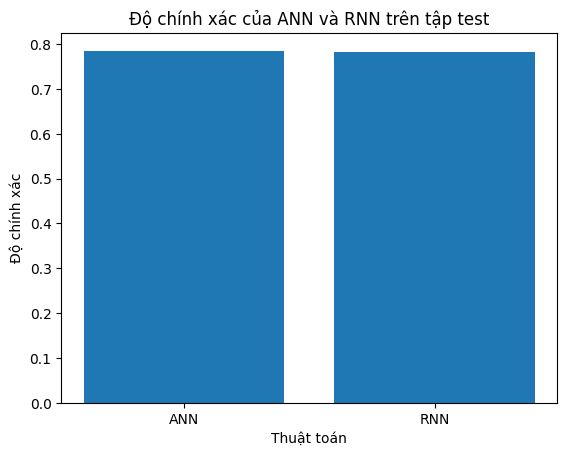

In [ ]:
# Độ chính xác của ANN và RNN
accuracies = [accuracy_ANN_test, accuracy_RNN_test]

# Tạo danh sách tên thuật toán tương ứng
algorithms = ['ANN', 'RNN']

# Vẽ biểu đồ cột thể hiện độ chính xác
plt.bar(algorithms, accuracies)

# Đặt tiêu đề và nhãn cho các trục
plt.title('Độ chính xác của ANN và RNN trên tập test')
plt.xlabel('Thuật toán')
plt.ylabel('Độ chính xác')

# Hiển thị biểu đồ
plt.show()

### CNN

In [ ]:
import os
import re
import pickle
import pandas as pd
import numpy as np
import seaborn as sn
import keras
from keras.preprocessing import text, sequence
from keras.layers import Input, Dense, Embedding, Flatten, Conv1D, MaxPooling1D, Bidirectional, LSTM, GRU, concatenate, GlobalMaxPooling1D, GlobalAveragePooling1D, SpatialDropout1D
from keras.layers import Reshape, Flatten, Dropout, Concatenate
from keras.callbacks import ModelCheckpoint
from keras.models import Model, Sequential
from keras import backend as K
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='loss', patience=10)#, verbose=1)
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
lb_enc = LabelEncoder()
import nltk
import string

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_train['transformed_text'])
tokenizer.fit_on_texts(data_dev['transformed_text'])
tokenizer.fit_on_texts(data_test['transformed_text'])

text_to_sequence_train = tokenizer.texts_to_sequences(data_train['transformed_text'])
text_to_sequence_dev = tokenizer.texts_to_sequences(data_dev['transformed_text'])
text_to_sequence_test = tokenizer.texts_to_sequences(data_test['transformed_text'])

In [ ]:
max_length_sequence_train = max([len(i) for i in text_to_sequence_train])

padded_train = pad_sequences(text_to_sequence_train, maxlen=max_length_sequence_train,
                                    padding = "pre")
max_length_sequence_train
padded_train

array([[   0,    0,    0, ...,   60,   73, 1230],
       [   0,    0,    0, ...,  759, 4342, 4343],
       [   0,    0,    0, ...,    0,    0, 5857],
       ...,
       [   0,    0,    0, ...,    5,    6,    7],
       [   0,    0,    0, ...,  169,  234,  251],
       [   0,    0,    0, ...,    5,    6,   31]], dtype=int32)

In [ ]:
padded_dev = pad_sequences(text_to_sequence_dev, maxlen=max_length_sequence_train,
                                    padding = "pre")
len(padded_dev)

1582

In [ ]:
padded_test = pad_sequences(text_to_sequence_test, maxlen=max_length_sequence_train,
                                    padding = "pre")
len(padded_test)

3945

In [ ]:
embed_size = 400 # how big is each word vector
max_features = 10000

In [ ]:
VOC_SIZE = len(tokenizer.word_index)+1
embedding_matrix = np.zeros((VOC_SIZE, embed_size))

def get_model():
    inp = Input(shape=(max_length_sequence_train,), dtype='int32')
    x = Embedding(VOC_SIZE ,embed_size,weights=[embedding_matrix])(inp)
    x = SpatialDropout1D(0.3)(x)

    conv_0 = Conv1D(128, kernel_size=3, kernel_initializer='normal', padding='valid', activation='elu')(x)
    maxpool_0 = MaxPooling1D(3, strides=1, padding='valid')(conv_0)

    conv_1 = Conv1D(128, kernel_size=5, kernel_initializer='normal', padding='valid', activation='elu')(x)
    maxpool_1 = MaxPooling1D(3, strides=1, padding='valid')(conv_1)

    conv_2 = Conv1D(128, kernel_size=6, kernel_initializer='normal', padding='valid', activation='elu')(x)
    maxpool_2 = MaxPooling1D(3, strides=1, padding='valid')(conv_2)

    z = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2])
#     flatten = Flatten()(z)
#     dropout = Dropout(drop)(flatten)
    z = Bidirectional(GRU(40, return_sequences=True))(z)
    avg_pool = GlobalAveragePooling1D()(z)
    max_pool = GlobalMaxPooling1D()(z)
    conc = concatenate([avg_pool, max_pool])
    outp = Dense(1, activation="sigmoid")(conc)
    model = Model(inputs=inp, outputs=outp)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [ ]:
model = get_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 179)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 179, 400)     5600000     ['input_3[0][0]']                
                                                                                                  
 spatial_dropout1d (SpatialDrop  (None, 179, 400)    0           ['embedding[0][0]']              
 out1D)                                                                                           
                                                                                                  
 conv1d (Conv1D)                (None, 177, 128)     153728      ['spatial_dropout1d[0][0]']  

In [ ]:
hist = model.fit(padded_train, y_train,epochs=40, batch_size=64,
                        validation_data=(padded_dev, y_dev), callbacks = [early_stop], verbose= 2)

Epoch 1/40


KeyboardInterrupt: ignored

In [ ]:
y_pred = model.predict(padded_train)
y_pred_train = np.round(y_pred)

# Evaluate performance on test set
acc = accuracy_score(y_train, y_pred_train)
prec = precision_score(y_train, y_pred_train)
y_pred_classes_train = np.round(y_pred_train)
# y_pred_classes = np.argmax(y_pred, axis=1)
f1_macro = f1_score(y_train, y_pred_classes_train, average='macro')
cm = confusion_matrix(y_train, y_pred_train)
print("Accuracy: ", acc)
print("Precision: ", prec)
print("F1 Macro: ", f1_macro)
print("Confusion Matrix: \n", cm)

In [ ]:
y_pred = model.predict(padded_dev)
y_pred_dev = np.round(y_pred)

# Evaluate performance on test set
acc = accuracy_score(y_dev, y_pred_dev)
prec = precision_score(y_dev, y_pred_dev)
y_pred_classes_dev = np.round(y_pred_dev)
f1_macro = f1_score(y_dev, y_pred_classes_dev, average='macro')
cm = confusion_matrix(y_dev, y_pred_dev)
print("Accuracy: ", acc)
print("Precision: ", prec)
print("F1 Macro: ", f1_macro)
print("Confusion Matrix: \n", cm)

In [ ]:
y_pred = model.predict(padded_test)
y_pred_test = np.round(y_pred)

# Evaluate performance on test set
acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test)
y_pred_classes_test = np.round(y_pred_test)
# y_pred_classes = np.argmax(y_pred, axis=1)
f1_macro = f1_score(y_test, y_pred_classes_test, average='macro')
cm = confusion_matrix(y_test, y_pred_test)
print("Accuracy: ", acc)
print("Precision: ", prec)
print("F1 Macro: ", f1_macro)
print("Confusion Matrix: \n", cm)

### LSTM

In [ ]:
import os
import re
import pickle
import pandas as pd
import numpy as np
import seaborn as sn
import keras
from keras.preprocessing import text, sequence
from keras.layers import Input, Dense, Embedding, Flatten, Conv2D, MaxPool2D, Bidirectional, LSTM, GRU, concatenate, GlobalMaxPooling1D, GlobalAveragePooling1D, SpatialDropout1D
from keras.layers import Reshape, Flatten, Dropout, Concatenate
from keras.callbacks import ModelCheckpoint
from keras.models import Model, Sequential
from keras import backend as K
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='loss', patience=10)#, verbose=1)
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
lb_enc = LabelEncoder()
import nltk
import string

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_train['transformed_text'])
tokenizer.fit_on_texts(data_dev['transformed_text'])
# tokenizer.fit_on_texts(data_test['transformed_text'])

text_to_sequence_train = tokenizer.texts_to_sequences(data_train['transformed_text'])
text_to_sequence_dev = tokenizer.texts_to_sequences(data_dev['transformed_text'])
text_to_sequence_test = tokenizer.texts_to_sequences(data_test['transformed_text'])
# text_to_sequence_dev

In [ ]:
max_length_sequence_train = max([len(i) for i in text_to_sequence_train])

padded_train = pad_sequences(text_to_sequence_train, maxlen=max_length_sequence_train,
                                    padding = "pre")
# max_length_sequence_train
padded_train

In [ ]:
# max_length_sequence_dev = max([len(i) for i in text_to_sequence_dev])

padded_dev = pad_sequences(text_to_sequence_dev, maxlen=max_length_sequence_train,
                                    padding = "pre")
len(padded_dev)


In [ ]:
# max_length_sequence_test = max([len(i) for i in text_to_sequence_test])

padded_test = pad_sequences(text_to_sequence_test, maxlen=max_length_sequence_train,
                                    padding = "pre")
len(padded_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Flatten, SimpleRNN, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [ ]:
len(tokenizer.word_index)+1

In [ ]:
VOC_SIZE = len(tokenizer.word_index) + 1  # 18359

def create_model():
    model = Sequential()
    model.add(Embedding(VOC_SIZE, 250, input_length=max_length_sequence_train))
    model.add(Dropout(0.4))

    model.add(LSTM(96, activation='tanh', recurrent_activation='sigmoid', return_sequences=True))
    model.add(Dropout(0.4))
    model.add(Dense(units=128, activation='tanh'))
    model.add(Dropout(0.4))
    model.add(Dense(units=1, activation='sigmoid'))

    model.add(Dense(1, activation='sigmoid'))
    return model

lstm_model = create_model()
lstm_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
lstm_model.summary()

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)


In [ ]:
history = lstm_model.fit(padded_train, np.reshape(y_train, (-1, 1)), epochs=50, batch_size=32,
                        validation_data=(padded_dev, np.reshape(y_dev, (-1, 1))), learning_rate = 0.002, callbacks = [early_stop])

In [ ]:
train_acc_history = history.history['accuracy']
max_train_acc = max(train_acc_history)
print('Highest accuracy on training set:', max_train_acc)

In [ ]:
y_pred_dev = lstm_model.predict(padded_dev)
y_pred_classes_dev = np.round(y_pred_dev)

# Evaluate performance on test set
acc = accuracy_score(y_dev, y_pred_classes_dev)
prec = precision_score(y_dev, y_pred_classes_dev)
f1 = f1_score(y_dev, y_pred_classes_dev)
cm = confusion_matrix(y_dev, y_pred_classes_dev)
print("Accuracy: ", acc)
print("Precision: ", prec)
print("F1 Score: ", f1)
print("Confusion Matrix: \n", cm)
f1_macro = f1_score(y_dev, y_pred_classes_dev, average='macro')
print("F1 Score (macro): ", f1_macro)

In [ ]:
y_pred = lstm_model.predict(padded_test)
y_pred_classes_test = np.round(y_pred)
#
# Evaluate performance on test set
acc = accuracy_score(y_test, y_pred_classes_test)
prec = precision_score(y_test, y_pred_classes_test)
f1 = f1_score(y_test, y_pred_classes_test)
cm = confusion_matrix(y_test, y_pred_classes_test)
print("Accuracy: ", acc)
print("Precision: ", prec)
print("F1 Score: ", f1)
print("Confusion Matrix: \n", cm)
f1_macro = f1_score(y_test, y_pred_classes_test, average='macro')
print("F1 Score (macro): ", f1_macro)